In [2]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [3]:
df_pov = pd.read_csv('thesis__data_res.csv', usecols = ['POVERTY', 'YEAR', 'MORTSTAT', 'USBORN', 'AGE'])

In [4]:
# use only samples that thesis takes into account
df_pov = df_pov[(df_pov['MORTSTAT']==1) | (df_pov['MORTSTAT']==2)]

# group
df_pov = df_pov[df_pov['POVERTY'] < 38]
df_pov['POVERTY'] = df_pov['POVERTY'].apply(lambda x: 1 if 10 <= x <= 14 else x)
df_pov['POVERTY'] = df_pov['POVERTY'].apply(lambda x: 2 if 20 <= x <= 25 else x)
df_pov['POVERTY'] = df_pov['POVERTY'].apply(lambda x: 3 if 31 <= x <= 32 else x)
df_pov['POVERTY'] = df_pov['POVERTY'].apply(lambda x: 4 if 33 <= x <= 34 else x)
df_pov['POVERTY'] = df_pov['POVERTY'].apply(lambda x: 5 if 35 <= x <= 36 else x)
df_pov['POVERTY'] = df_pov['POVERTY'].apply(lambda x: 6 if x == 37 else x)

# relabel
df_pov['POVERTY'] = df_pov['POVERTY'].map({
    1: '<1', 2: '[1,2)', 3: '[2,3)', 4: '[3,4)', 5: '[4,5)', 6: '5+'})

In [5]:
# calculate the percentage of each poverty level within each age
pivot_age = df_pov.pivot_table(index='AGE', columns='POVERTY', aggfunc='size', fill_value=0)
percentages_age = pivot_age.div(pivot_age.sum(axis=1), axis=0) * 100

In [6]:
# calculate the percentage of each poverty level within each year
pivot_year = df_pov.pivot_table(index='YEAR', columns='POVERTY', aggfunc='size', fill_value=0)
percentages_year = pivot_year.div(pivot_year.sum(axis=1), axis=0) * 100

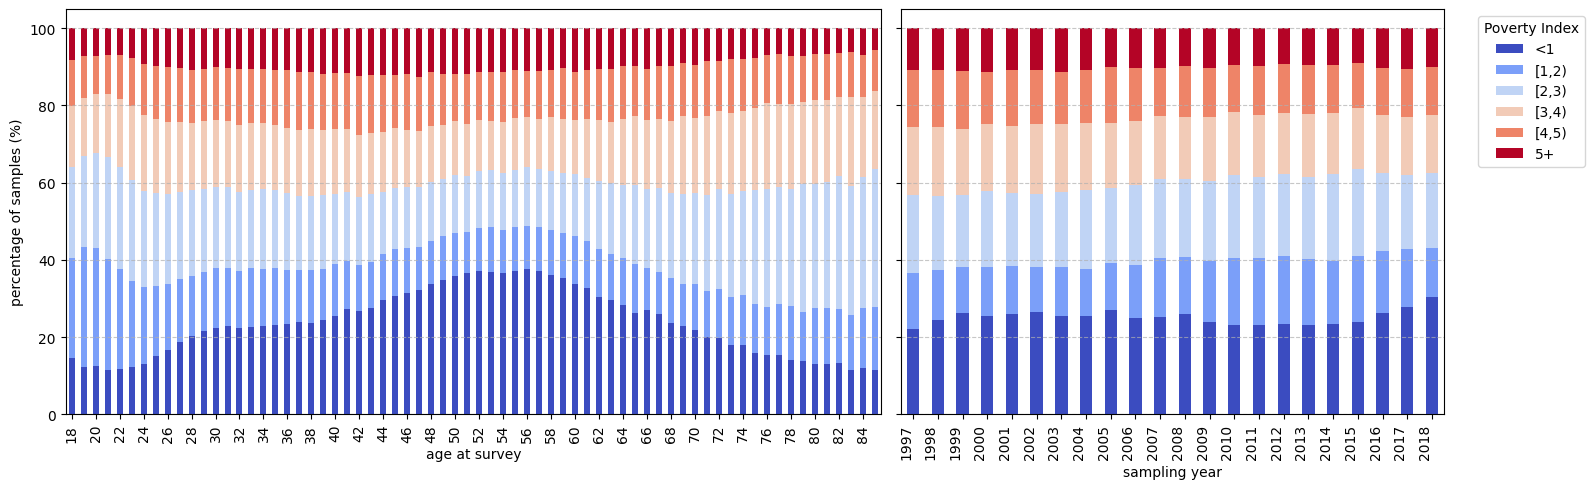

In [8]:
# plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True, gridspec_kw={'width_ratios': [3, 2]})

# define the labaes for poverty levels
poverty_order = ['<1', '[1,2)', '[2,3)', '[3,4)', '[4,5)', '5+']

# stacked bar chart for AGE
percentages_age.plot(
    kind='bar', stacked=True, ax=axes[0], colormap='coolwarm', width=0.5, legend=False
)

# axes[0].set_title("Percentage by Age and Poverty Level")
axes[0].set_xlabel('age at survey')
axes[0].set_ylabel('percentage of samples (%)')

# customize x-axis to show every second age
age_values = percentages_age.index  
axes[0].set_xticks(range(len(age_values))[::2])  
axes[0].set_xticklabels(age_values[::2], rotation=90)  

# stacked bar chart for YEAR
percentages_year.index = percentages_year.index.get_level_values(0)
percentages_year.plot(
    kind='bar', stacked=True, ax=axes[1], colormap='coolwarm', width=0.5, 
)
# axes[1].set_title
axes[1].set_xlabel('sampling year')
axes[1].set_ylabel('percentage (%)')
axes[1].legend(title="Poverty Index", bbox_to_anchor=(1.05, 1), loc='upper left', labels=poverty_order)

# adjust x-axis labels for the YEAR plot
axes[1].set_xticks(range(len(percentages_year.index)))
axes[1].set_xticklabels(percentages_year.index, rotation=90, ha='right')

# add gridlines for both plots
for ax in axes:
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("combined_stacked_bars_poverty.jpg", format='jpg')
plt.show()